##1.The monthly average atmospheric pressure (in mb) measured at surface level for 24 consecutive months are 963.65, 965.03, 961.18, 959.43, 957.68, 953.42,950.11, 952.44, 952.25, 956.88, 963.66,963.36, 965.56, 964.5, 963.66, 960.91,956.9, 952.18, 950.71, 952.54, 951.43, 955.06, 959.01, and 962.60. Find the autocorrelation and partial autocorrelation functions at lags 0, 1, 2, and 3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
months = np.arange(1, 25, 1)
atmospheric_pressure = [963.65, 965.03, 961.18, 959.43, 957.68, 953.42, 950.11, 952.44, 952.25, 956.88,
                        963.66, 963.36, 965.56, 964.5, 963.66, 960.91, 956.9, 952.18, 950.71, 952.54,
                        951.43, 955.06, 959.01, 962.60]

df = pd.DataFrame({'Months': months, 'Atmospheric_pressure': atmospheric_pressure})

df.head()

,Months,Atmospheric_pressure
0,1,963.65
1,2,965.03
2,3,961.18
3,4,959.43
4,5,957.68


In [4]:
df.set_index('Months',inplace=True)
df.head()

,Atmospheric_pressure
Months,
1,963.65
2,965.03
3,961.18
4,959.43
5,957.68


In [5]:
df.tail()

,Atmospheric_pressure
Months,
20,952.54
21,951.43
22,955.06
23,959.01
24,962.60


<Axes: xlabel='Months', ylabel='Atmospheric_pressure'>

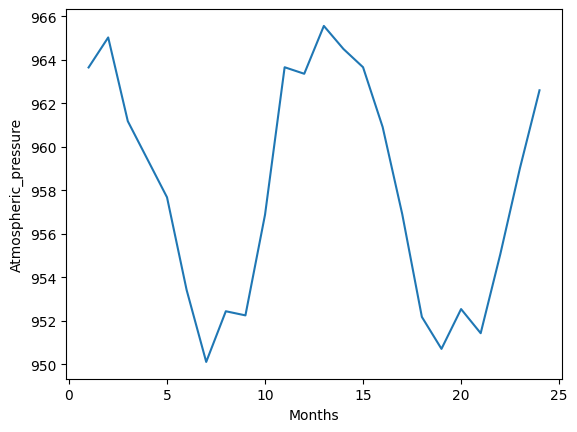

In [6]:
sns.lineplot(data=df,x=df.index,y=df.Atmospheric_pressure)

In [ ]:
df.describe()

,Atmospheric_pressure,rollMean,rollStd
count,24.000000,24.000000,0.0
mean,958.089583,958.089583,NaN
std,5.252613,5.252613,NaN
min,950.110000,950.110000,NaN
25%,952.515000,952.515000,NaN
50%,958.345000,958.345000,NaN
75%,963.432500,963.432500,NaN
max,965.560000,965.560000,NaN


## Stationarity

<Axes: xlabel='Months', ylabel='Atmospheric_pressure'>

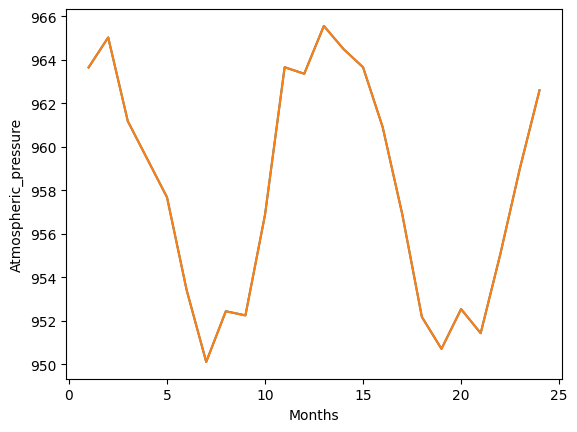

In [7]:
# Checked by ADF(Augmented Dickey-Fuller test)
# 1. Test Statistics < Critical Values

# 2. Rolling Statistics

df['rollMean']= df.Atmospheric_pressure.rolling(window=1).mean()
df['rollStd'] = df.Atmospheric_pressure.rolling(window=1).std()

sns.lineplot(data=df,x=df.index,y='Atmospheric_pressure')
sns.lineplot(data=df,x=df.index,y='rollMean')
sns.lineplot(data=df,x=df.index,y='rollStd')

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfTest= adfuller(df['Atmospheric_pressure'],autolag= 'AIC')

In [10]:
adfTest

(-2.497603156355523,
 0.11605859242572658,
 9,
 14,
 {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 49.414519254463855)

In [11]:
stats= pd.Series(adfTest[:4],index=['Test Statistic','p-value','#lags used','no of observations used'])
stats

Test Statistic             -2.497603
p-value                     0.116059
#lags used                  9.000000
no of observations used    14.000000
dtype: float64

In [12]:
for key, values in adfTest[4].items():
  print('criticalities',key,':',values)

criticalities 1% : -4.01203360058309
criticalities 5% : -3.1041838775510207
criticalities 10% : -2.6909873469387753


In [13]:
def test_stationarity(dataFrame,var):
  df['rollMean']= dataFrame[var].rolling(window=1).mean()
  df['rollStd'] = dataFrame[var].rolling(window=1).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest= adfuller(dataFrame[var],autolag= 'AIC')
  stats= pd.Series(adfTest[:4],index=['Test Statistic','p-value','#lags used','no of observations used'])
  print(stats)

  for key, values in adfTest[4].items():
    print('criticalities',key,':',values)

  sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
  sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
  sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

Test Statistic             -2.497603
p-value                     0.116059
#lags used                  9.000000
no of observations used    14.000000
dtype: float64
criticalities 1% : -4.01203360058309
criticalities 5% : -3.1041838775510207
criticalities 10% : -2.6909873469387753


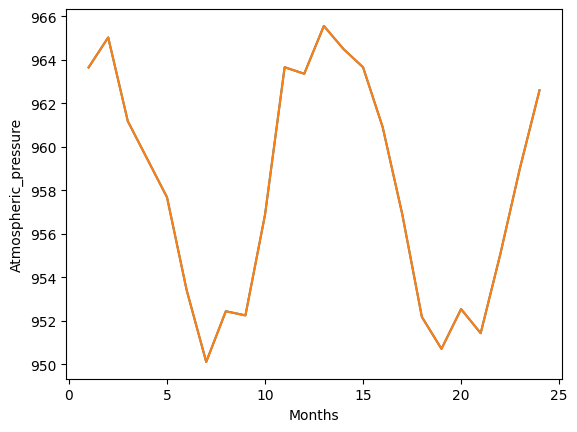

In [14]:
test_stationarity(df,'Atmospheric_pressure')

In [15]:
df.head()

,Atmospheric_pressure,rollMean,rollStd
Months,,,
1,963.65,963.65,NaN
2,965.03,965.03,NaN
3,961.18,961.18,NaN
4,959.43,959.43,NaN
5,957.68,957.68,NaN


Autocorrelation Function (ACF): [1.         0.78160159 0.41394261 0.00848104]
Partial Autocorrelation Function (PACF): [ 1.          0.81558426 -0.63796207 -0.36892862]


<ipython-input-16-fd06218d689b>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, acf_values, use_line_collection=True)
<ipython-input-16-fd06218d689b>:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, pacf_values, use_line_collection=True)


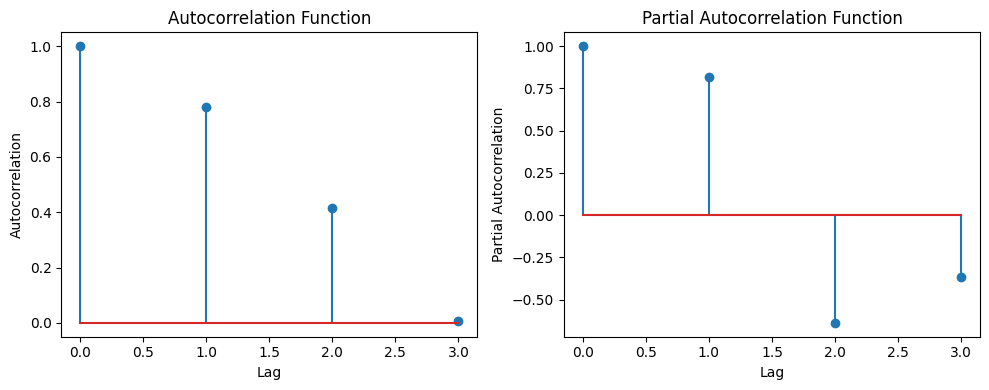

In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Given data
atmospheric_pressure = np.array([963.65, 965.03, 961.18, 959.43, 957.68, 953.42, 950.11, 952.44, 952.25, 956.88, 963.66, 963.36, 965.56, 964.5, 963.66, 960.91, 956.9, 952.18, 950.71, 952.54, 951.43, 955.06, 959.01, 962.60])

# Create a pandas Series object with the data
atmospheric_pressure_series = pd.Series(atmospheric_pressure)

# Compute autocorrelation function (ACF) at lags 0, 1, 2, and 3
acf_values = acf(atmospheric_pressure_series, nlags=3)

# Compute partial autocorrelation function (PACF) at lags 0, 1, 2, and 3
pacf_values = pacf(atmospheric_pressure_series, nlags=3)

# Print autocorrelation and partial autocorrelation values
print("Autocorrelation Function (ACF):", acf_values)
print("Partial Autocorrelation Function (PACF):", pacf_values)

# Plot ACF and PACF
lags = [0, 1, 2, 3]
plt.figure(figsize=(10, 4))

# Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(lags, acf_values, use_line_collection=True)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Partial autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(lags, pacf_values, use_line_collection=True)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()


In [17]:
atmospheric_pressure = np.array([963.65, 965.03, 961.18, 959.43, 957.68, 953.42, 950.11, 952.44, 952.25, 956.88, 963.66, 963.36, 965.56, 964.5, 963.66, 960.91, 956.9, 952.18, 950.71, 952.54, 951.43, 955.06, 959.01, 962.60])


atmospheric_pressure_series = pd.Series(atmospheric_pressure)


acf_values = acf(atmospheric_pressure_series, nlags=3)


pacf_values = pacf(atmospheric_pressure_series, nlags=3)

# Print the values of ACF and PACF
print("Autocorrelation Function (ACF):", acf_values)
print("Partial Autocorrelation Function (PACF):", pacf_values)




Autocorrelation Function (ACF): [1.         0.78160159 0.41394261 0.00848104]
Partial Autocorrelation Function (PACF): [ 1.          0.81558426 -0.63796207 -0.36892862]


## 2.The annual evapotranspiration (in cm/year) for a basin in last 20 years are 61.04, 58.71, 60.02,60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45, 65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04,66.53, and 68.02. find the autocorrelation and partial autocorrelation coefficient at lags 0, 1 and 2.Find the 95% confidence limit for the ACF and PACF at lag 2

Autocorrelation Function (ACF) at lags 0, 1, and 2: [1.         0.78414576 0.67764307]
Partial Autocorrelation Function (PACF) at lags 0, 1, and 2: [1.         0.82541659 0.2247475 ]
95% Confidence Limits for ACF at lag 2: [-0.43826932358995874, 0.43826932358995874]
95% Confidence Limits for PACF at lag 2: [-0.43826932358995874, 0.43826932358995874]


<ipython-input-28-6be1d20f2c12>:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_values, use_line_collection=True)
<ipython-input-28-6be1d20f2c12>:37: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(pacf_values, use_line_collection=True)


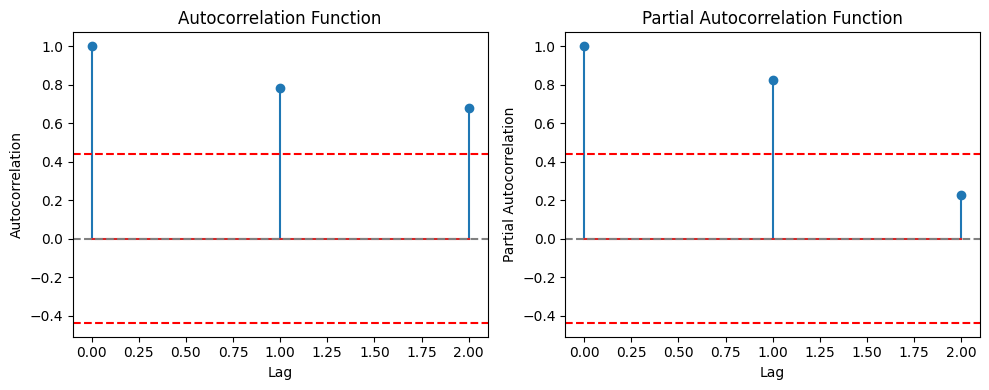

In [28]:
evapotranspiration = np.array([61.04, 58.71, 60.02, 60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45,
                               65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04, 66.53, 68.02])

evapotranspiration_series = pd.Series(evapotranspiration)

acf_values = acf(evapotranspiration_series, nlags=2)
pacf_values = pacf(evapotranspiration_series, nlags=2)


print("Autocorrelation Function (ACF) at lags 0, 1, and 2:", acf_values)
print("Partial Autocorrelation Function (PACF) at lags 0, 1, and 2:", pacf_values)


acf_ci = 1.96 / np.sqrt(len(evapotranspiration_series))   #formula for confidence inteval
print("95% Confidence Limits for ACF at lag 2:", [-acf_ci, acf_ci])


pacf_ci = 1.96 / np.sqrt(len(evapotranspiration_series))    #formula for confidence inteval
print("95% Confidence Limits for PACF at lag 2:", [-pacf_ci, pacf_ci])


# Plot ACF and PACF
plt.figure(figsize=(10, 4))

# Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(acf_values, use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=acf_ci, linestyle='--', color='red')
plt.axhline(y=-acf_ci, linestyle='--', color='red')
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Partial autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(pacf_values, use_line_collection=True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=pacf_ci, linestyle='--', color='red')
plt.axhline(y=-pacf_ci, linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

##3. At a location, the daily air temperature follows the ARMA(2,1) model given below, X(t) = 0.7X(t −1) + 0.2X(t − 2) + ε(t) + 0.7ε(t − 1) If the air temperature recorded in the last week (in ◦C) was 16.5,15.2, 18.2, 16.3, 19.4, 17.8, and 15.7, then forecast air temperature and their 95% confidence limit for next three days. Assume that the variance of residual is unity. Further, update the forecast for remaining two days, if the temperature on eighth day is recorded as 14.5◦C

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

temperature = np.array([16.5, 15.2, 18.2, 16.3, 19.4, 17.8, 15.7])

# Fit ARMA(2,1) model to the given data
model = ARIMA(temperature, order=(2, 0, 1))
model_fit = model.fit()

# Forecast air temperature for the next three days
forecast_next_three_days = model_fit.forecast(steps=3)

# Print forecasted temperature for the next three days
print("Forecasted temperature for the next three days:")
for i, temp in enumerate(forecast_next_three_days):
    print(f"Day {i+1}: {temp:.2f} °C")

updated_temperature = np.append(temperature, 14.5)

updated_model = ARIMA(updated_temperature, order=(2, 0, 1))
updated_model_fit = updated_model.fit()

forecast_remaining_days = updated_model_fit.forecast(steps=2)

print("\nUpdated forecasted temperature for the remaining two days:")
for i, temp in enumerate(forecast_remaining_days):
    print(f"Day {i+7}: {temp:.2f} °C")


Forecasted temperature for the next three days:
Day 1: 16.91 °C
Day 2: 17.44 °C
Day 3: 17.33 °C

Updated forecasted temperature for the remaining two days:
Day 7: 17.69 °C
Day 8: 18.44 °C
